# Convolutional Neural Networks and Computer Vision with TensorFlow - Pizza and Steak

### Get the data
#### Dataset link: https://www.kaggle.com/dansbecker/food-101

In [16]:
# import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# #unzip
# pizza_steak_zip = zipfile.ZipFile("pizza_steak.zip")
# pizza_steak_zip.extractall()
# pizza_steak_zip.close()

In [17]:
!ls pizza_steak/train/steak | head

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
ls: write error: Broken pipe


In [18]:
!ls pizza_steak/train/steak | wc -l

750


In [19]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [20]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [21]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [22]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['3793314.jpg']
Image shape: (512, 512, 3)


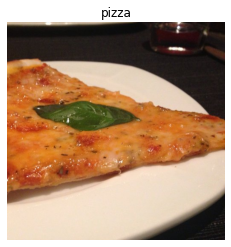

In [23]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [24]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[209, 180, 148],
        [209, 180, 148],
        [209, 180, 148],
        ...,
        [ 14,  10,  11],
        [ 15,  11,  12],
        [ 16,  12,  13]],

       [[215, 186, 154],
        [214, 185, 153],
        [214, 185, 153],
        ...,
        [ 15,  11,  12],
        [ 16,  12,  13],
        [ 17,  13,  14]],

       [[216, 189, 159],
        [215, 188, 158],
        [215, 188, 158],
        ...,
        [ 16,  12,  13],
        [ 17,  13,  14],
        [ 18,  14,  15]],

       ...,

       [[241, 223, 201],
        [241, 223, 201],
        [240, 222, 200],
        ...,
        [ 31,  25,  27],
        [ 35,  29,  31],
        [ 36,  30,  32]],

       [[241, 223, 199],
        [241, 223, 199],
        [241, 223, 199],
        ...,
        [ 30,  24,  26],
        [ 34,  28,  30],
        [ 36,  30,  32]],

       [[242, 224, 200],
        [241, 223, 199],
        [241, 223, 199],
        ...,
        [ 22,  16,  1

In [25]:
type(img), img.shape

(numpy.ndarray, (512, 512, 3))

In [26]:
# scale/normalize the data, as neural networks love values between 0 & 1)
img / 255.

array([[[0.81960784, 0.70588235, 0.58039216],
        [0.81960784, 0.70588235, 0.58039216],
        [0.81960784, 0.70588235, 0.58039216],
        ...,
        [0.05490196, 0.03921569, 0.04313725],
        [0.05882353, 0.04313725, 0.04705882],
        [0.0627451 , 0.04705882, 0.05098039]],

       [[0.84313725, 0.72941176, 0.60392157],
        [0.83921569, 0.7254902 , 0.6       ],
        [0.83921569, 0.7254902 , 0.6       ],
        ...,
        [0.05882353, 0.04313725, 0.04705882],
        [0.0627451 , 0.04705882, 0.05098039],
        [0.06666667, 0.05098039, 0.05490196]],

       [[0.84705882, 0.74117647, 0.62352941],
        [0.84313725, 0.7372549 , 0.61960784],
        [0.84313725, 0.7372549 , 0.61960784],
        ...,
        [0.0627451 , 0.04705882, 0.05098039],
        [0.06666667, 0.05098039, 0.05490196],
        [0.07058824, 0.05490196, 0.05882353]],

       ...,

       [[0.94509804, 0.8745098 , 0.78823529],
        [0.94509804, 0.8745098 , 0.78823529],
        [0.94117647, 0

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(img)

# ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

### For building the end to end CNN, below steps will be followed:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [28]:
# import modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Build CNN model

# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# create model
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    #MaxPool2D(pool_size=2, padding="valid"),
    
    Conv2D(10, 3, activation="relu"),
    # Conv2D(10, 3, activation="relu"),
    # MaxPool2D(2),
    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 74ms/step - loss: 1.0321 - accuracy: 0.6187 - val_loss: 0.5423 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 3s 69ms/step - loss: 0.4624 - accuracy: 0.8007 - val_loss: 0.4169 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 3s 72ms/step - loss: 0.4566 - accuracy: 0.7933 - val_loss: 0.5134 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 3s 73ms/step - loss: 0.4198 - accuracy: 0.8040 - val_loss: 0.3819 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 3s 69ms/step - loss: 0.2840 - accuracy: 0.8953 - val_loss: 0.3652 - val_accuracy: 0.8440


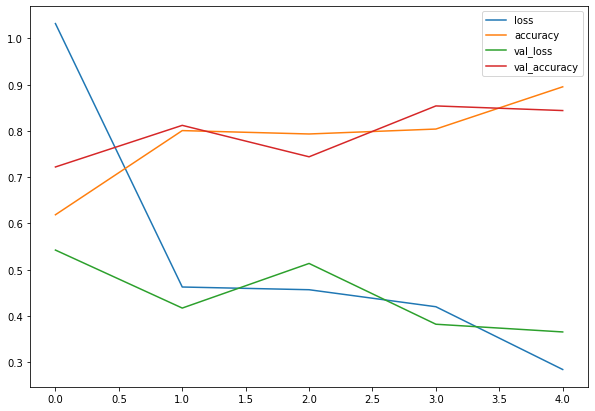

In [31]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [32]:
# Build CNN model with MaxPool2D

# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# create model
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile CNN
model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [33]:
# fit the model
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 76ms/step - loss: 0.5766 - accuracy: 0.6940 - val_loss: 0.4186 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 3s 67ms/step - loss: 0.4567 - accuracy: 0.7927 - val_loss: 0.3599 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 3s 67ms/step - loss: 0.4141 - accuracy: 0.8233 - val_loss: 0.3308 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 3s 68ms/step - loss: 0.3772 - accuracy: 0.8333 - val_loss: 0.3281 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 3s 67ms/step - loss: 0.3016 - accuracy: 0.8713 - val_loss: 0.3309 - val_accuracy: 0.8560


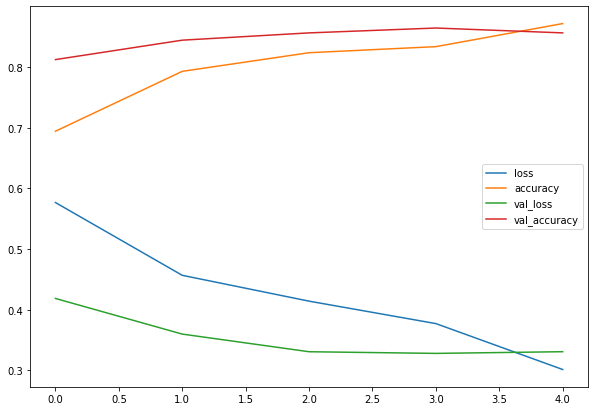

In [34]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [35]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

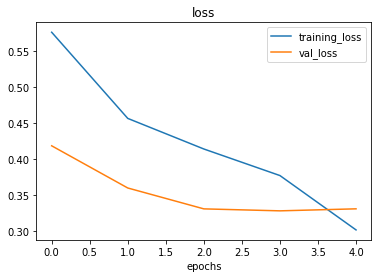

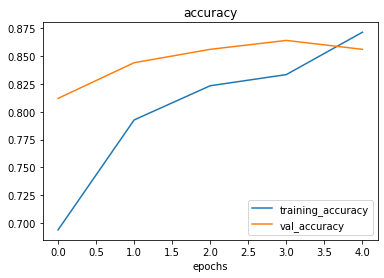

In [36]:
plot_loss_curves(history_2)

### Using aguemented data as training data

In [37]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [38]:
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                          batch_size=32,
                                                          target_size=(224, 224),
                                                          class_mode="binary",
                                                          shuffle=False)
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [39]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

In [40]:
images.shape, labels.shape

((32, 224, 224, 3), (32,))

showing image number: 4


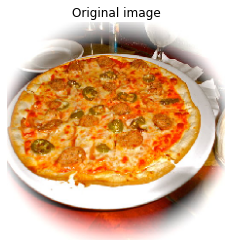

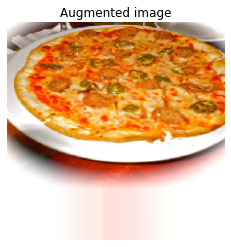

In [41]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

#### build the model using augmented data where shufffle was False

In [42]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [43]:
# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# create the model
model_3 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Flatten(),
    Dense(1, activation="sigmoid")
    
])

# compile the model
model_3.compile(
    loss=binary_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

# fit the model
history_3 = model_3.fit(
        train_data_augmented,
        epochs=5,
        steps_per_epoch=len(train_data_augmented),
        validation_data=test_data,
        validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 14s 290ms/step - loss: 0.7293 - accuracy: 0.4260 - val_loss: 0.6914 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.6983 - accuracy: 0.5273 - val_loss: 0.6889 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 13s 277ms/step - loss: 0.7140 - accuracy: 0.4947 - val_loss: 0.6936 - val_accuracy: 0.5260
Epoch 4/5
47/47 [==============================] - 13s 269ms/step - loss: 0.6933 - accuracy: 0.5053 - val_loss: 0.6930 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6929 - val_accuracy: 0.5440


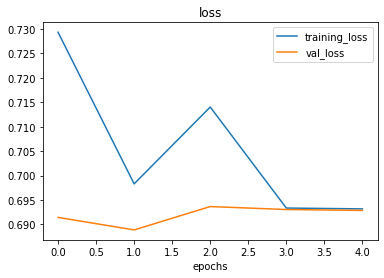

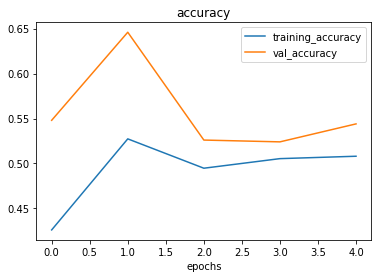

In [44]:
# Check our models training curves
plot_loss_curves(history_3)

#### Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [45]:
# import the data and augment, then shuffle it
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                          target_size=(224, 224),
                                                                          shuffle=True) ## ===> by default it is true

Found 1500 images belonging to 2 classes.


In [61]:
# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

#  create the model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_4.compile(loss=binary_crossentropy,
               optimizer=Adam(),
               metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(
                train_data_augmented_shuffle,
                epochs=5,
                steps_per_epoch=len(train_data_augmented_shuffle),
                validation_data=test_data,
                validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 13s 270ms/step - loss: 0.6565 - accuracy: 0.6020 - val_loss: 0.5470 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 13s 270ms/step - loss: 0.5478 - accuracy: 0.7340 - val_loss: 0.4159 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4921 - accuracy: 0.7787 - val_loss: 0.3645 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4820 - accuracy: 0.7833 - val_loss: 0.4287 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 13s 271ms/step - loss: 0.4947 - accuracy: 0.7700 - val_loss: 0.3745 - val_accuracy: 0.8380


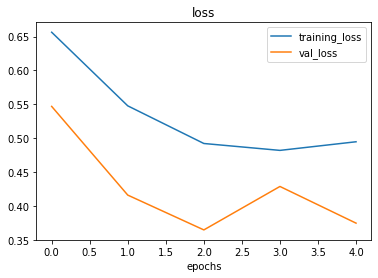

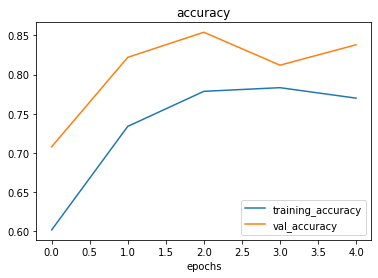

In [62]:
# Check our models training curves
plot_loss_curves(history_4)

#### **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### Making Prediction with custom data

In [63]:
class_names

array(['pizza', 'steak'], dtype='<U5')

--2022-01-20 07:59:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2022-01-20 07:59:18 (23.1 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



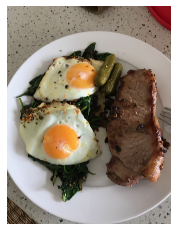

In [49]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [64]:
type(steak), steak.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([224, 224, 3]))

In [65]:
# Need to resize the image as per model i.e. (224, 224, 3)

def resize_and_scale_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, img_shape, colour_channels).
    """
    # read the image
    raw = tf.io.read_file(filename)
    # decode raw image to tensor
    img = tf.image.decode_image(raw)
    # resize the image
    resized_img = tf.image.resize(img, [img_shape, img_shape])
    # rescale image
    scaled_img = resized_img/225.
    
    return scaled_img

In [66]:
# Load in and preprocess our custom image
steak = resize_and_scale_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [67]:
#predict using model_4
pred = model_4.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.93079245]], dtype=float32)

In [54]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [68]:
# rounding prediction probability and getting the name from class_name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [70]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = resize_and_scale_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


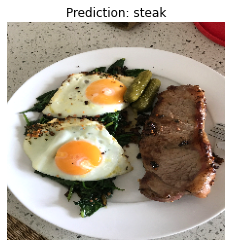

In [71]:
# Test our model on a custom image
pred_and_plot(model_4, "03-steak.jpeg")

In [58]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-01-20 07:59:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2022-01-20 07:59:20 (32.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


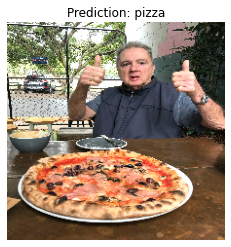

In [72]:
pred_and_plot(model_4, "03-pizza-dad.jpeg")